# Análisis Exploratorio de Datos: EDA - Parte 2
Esta segunda parte se centra en la realización de gráficos de valor, que nos brinden la información adecuada para encontrar las características importantes en los datos antes de empezar con la elaboración del dashboard.


In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from summarytools import dfSummary
import warnings
warnings.filterwarnings('ignore')

In [59]:
# Empezamos trayendo los archivos CSV que habíamos generado anteriormente
dfHechos = pd. read_csv('homicidios_hechos.csv')
dfVictimas = pd.read_csv('homicidios_victimas.csv')
dfHomicidios = pd.read_csv('homicidios_merge.csv')

In [60]:
# Seleccionamos un estilo para las gráficas
sns.set(style = 'darkgrid', palette = 'muted')

### Distribución Temporal
Para empezar y tener una noción general del comportamiento de los datos, haremos gráficos para cada año estudiado, tomando como variables el número de homicidios por año.

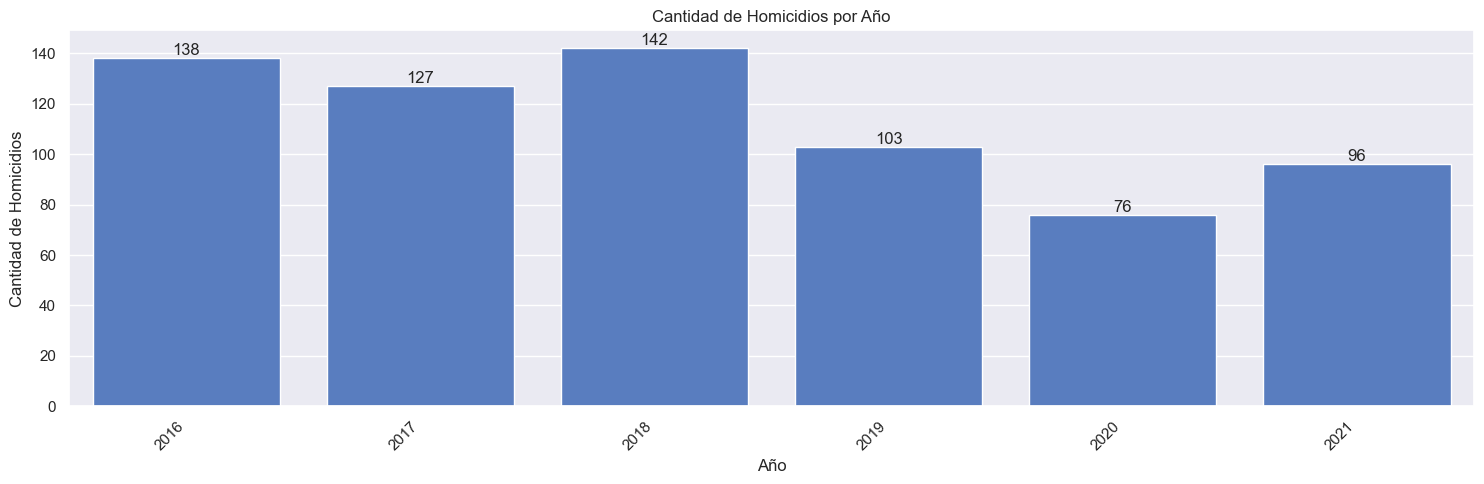

In [61]:
plt.figure(figsize = (15, 5))
# Creamos el subplot de cantidad de homicidios
plt.subplot()
# Añadimos la columna del año del homicidio como 'x'
ax = sns.countplot(data = dfHechos, x = 'año')
# Añadimos el conteo en cada barra
for label in ax.containers:
    ax.bar_label(label)
# Nombramos los ejes
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Año')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Homicidios por Año')
# Se configura la imagen como estrecha
plt.tight_layout()
plt.show()

A partir de esta gráfica podemos ver la disminución que tuvieron los homicidios en los ultimos años, teniendo en cuenta que el año 2020 la llegada de la pandemia del COVID-19 tuvo que ver en dicha disminución. 

Ahora, haremos esta misma gráfica para ver la cantidad de victimas por año:

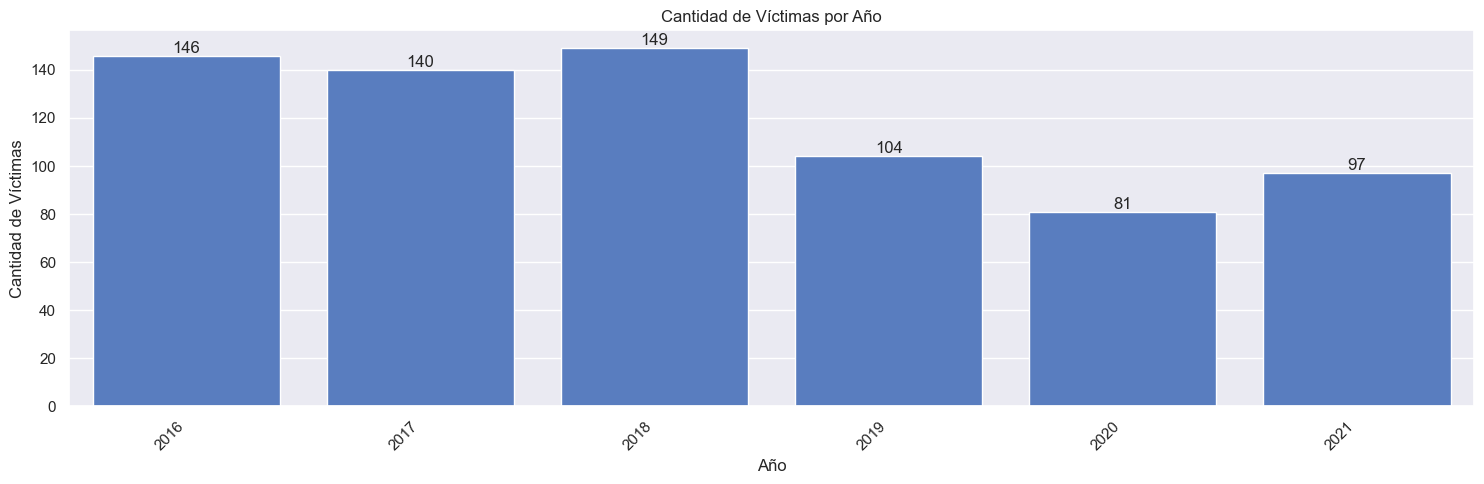

In [62]:
plt.figure(figsize = (15, 5))
# Creamos el subplot de cantidad de victimas 
plt.subplot()
# Añadimos la columna del año del homicidio como 'x'
ax = sns.countplot(data = dfVictimas, x = 'año')
# Añadimos el conteo en cada barra
for label in ax.containers:
    ax.bar_label(label)
# Nombramos los ejes
plt.ylabel('Cantidad de Víctimas')
plt.xlabel('Año')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Víctimas por Año')
# Se configura la imagen como estrecha
plt.tight_layout()
plt.show()

Se puede ver que la cantidad de víctimas no difiere mucho de la cantidad de homicidios, lo que quiere decir que fueron pocos los siniestros donde se presentó más de una victima por homicidio. 
La cantidad de homicidios es levemente menor que la cantidad de víctimas, lo que indica que no todas las victimas fueron mortales en los siniestros. 

### Distribución mensual
Ahora veremos la distribución la cantidad de victimas por cada año, en un grafico de lineas por meses.
Entonces se crea una función que cree un gráfico de línea, tomando un dataframe como parámetro, del cual extrae los valores de los siniestros.

In [63]:
def victimasPorMes(df):
    # Se obtiene una lista de años únicos
    años = df['año'].unique()
    # Se crea una lista con los nombres de los meses 
    months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    # Se crea una figura con subgráficos en una cuadrícula de 2x3
    fig, axes = plt.subplots(3, 2, figsize=(18, 8))

    # Se itera a través de los años y crea un gráfico por año
    for i, year in enumerate(años):
        fila = i // 2
        columna = i % 2
        
        # Se filtran los datos para el año actual y agrupa por mes
        data_mensual = (df[df['año'] == year]
                        .groupby('mes')
                        .agg({'n victimas':'sum'}))
        # Se reemplaza el índice por months
        data_mensual.index = months

        # Se configura el subgráfico actual
        ax = axes[fila, columna]
        data_mensual.plot(ax=ax, kind='line')
        ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')
        ax.legend_ = None
        ax.set_xticks(range(len(months)))
        ax.set_xticklabels(months, rotation = 45, ha = 'right')

        
    # Se configura la imagen como estrecha
    plt.tight_layout()
    plt.show()

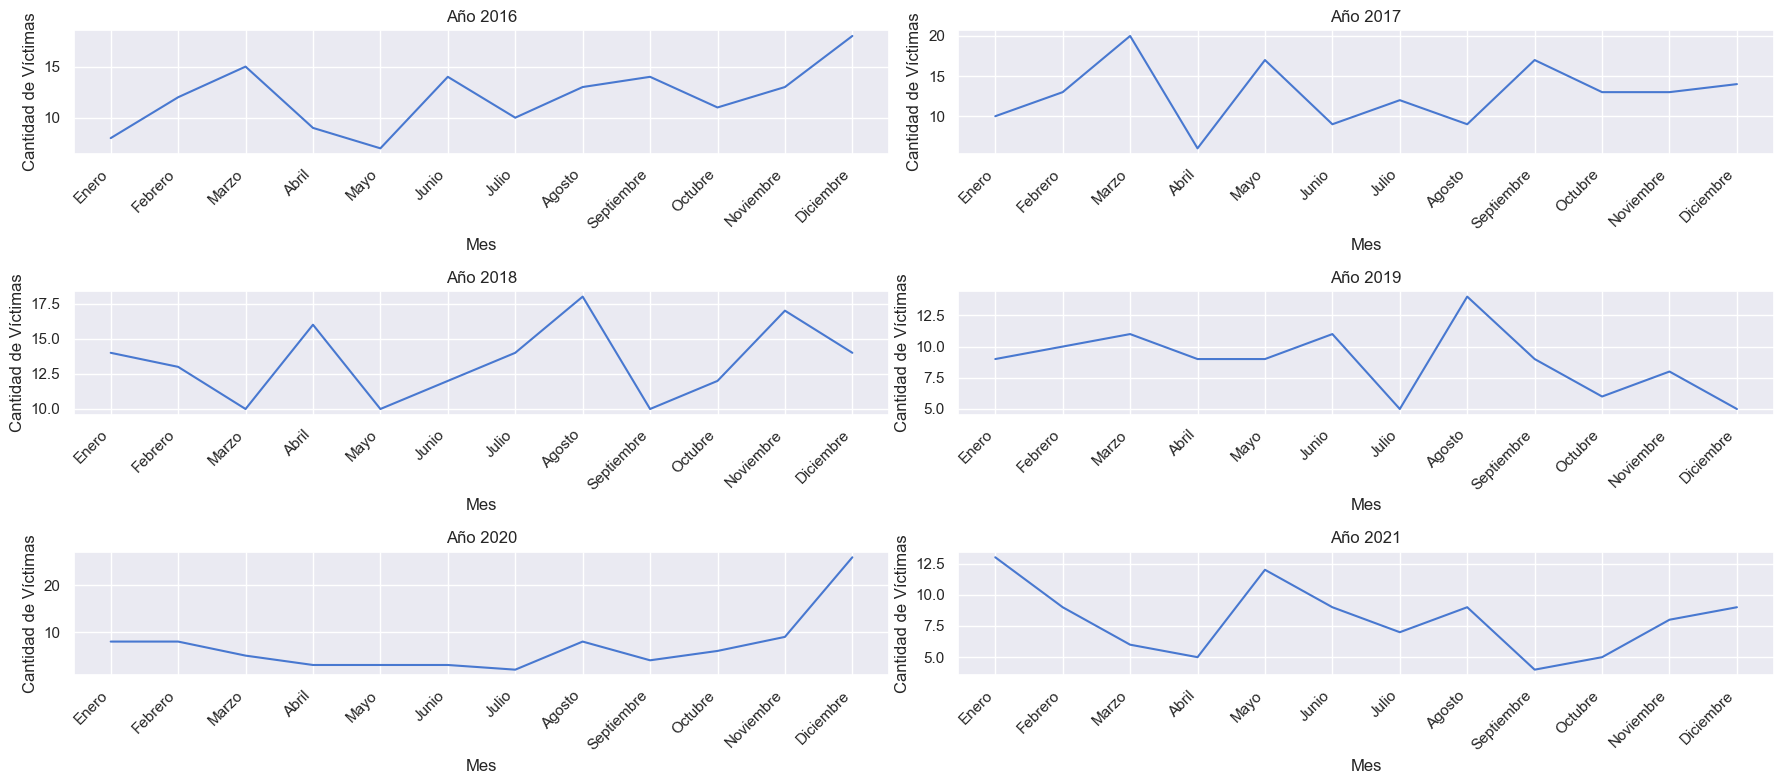

In [64]:
victimasPorMes(dfHomicidios)

Para tener mayor precisión en el análisis de estos datos, unificamos los datos de todos los años y los agrupamos por mes para tener una información más clara de cuales son los meses del año en que más se presentan accidentes de tránsito en estos años. 

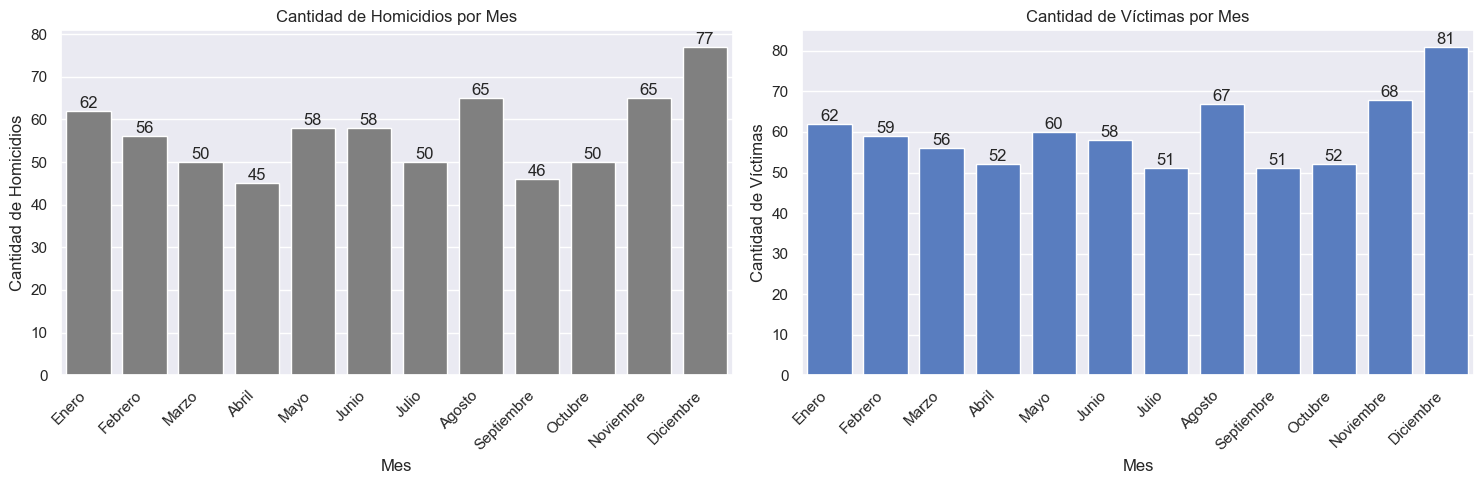

In [65]:
# Se crea la figura
plt.figure(figsize = (15, 5))
# Creamos la lista con el nombre de los meses 
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
# Creamos el primer subplot de cantidad de homicidios
plt.subplot(1, 2, 1)
# Añadimos la columna del mes del homicidio como 'x'
ax = sns.countplot(data = dfHechos, x = 'mes', color = 'gray')
# Se añade el conteo a # Añadimos el conteo en cada barra
for label in ax.containers:
    ax.bar_label(label)
# Se nombra el eje Y
plt.ylabel('Cantidad de Homicidios')
# Se nombra el eje X
plt.xlabel('Mes')
# Se reemplaza el índice de X por el nombre de los meses y se establece rotación
ax.set_xticklabels(months, rotation = 45, ha = 'right')
# Se titula el gráfico
plt.title('Cantidad de Homicidios por Mes')

# Creamos el segundo subplot de cantidad de víctimas
plt.subplot(1, 2, 2)
# Añadimos la columna del mes del homicidio como 'x'
ax = sns.countplot(data = dfVictimas, x = 'mes')
# Añadimos el conteo en cada barra
for label in ax.containers:
    ax.bar_label(label)
# Se nombra el eje Y
plt.ylabel('Cantidad de Víctimas')
# Se nombra el eje X
plt.xlabel('Mes')
# Se reemplaza el índice de X por el nombre de los meses y se establece rotación
ax.set_xticklabels(months, rotation = 45, ha = 'right')
# Se titula el gráfico
plt.title('Cantidad de Víctimas por Mes')

# Se configura la imagen como estrecha
plt.tight_layout()
# Se muestra el gráfico
plt.show()

A partir de estas gráficas podemos decir que Diciembre es el mes con las cifras más altas tanto para homicidios como para victimas, seguido de los meses de Noviembre y Agosto. También podemos decir que el mes con menor impacto de estos siniestros es el mes de Septiembre.

Esta información es bastante interesante para el contexto del proyecto, pues a partir de este tipo de datos, se pueden estudiar posteriormente diversos factores sociales y culturales que se presenten en estos meses para tomar medidas que sean efectivas para la disminución de estos siniestros.


A continuación, veremos el promedio de homicidios y victimas por mes:

In [66]:
# Creamos los datos de los homicidios agrupados por mes
dataHomicidios = (dfHechos.groupby('mes')['id hecho'].count().reset_index())

# Creamos los datos de las víctimas agrupados por mes
dataVictimas = (dfVictimas.groupby('mes')['id hecho'].count().reset_index())

# Se imprime la media de homicidios por mes
print(f'La media de homicidios por mes es de: {round(np.mean(dataHomicidios["id hecho"]),2)}')

# Se imprime la media de víctimas por mes
print(f'La media de víctimas por mes es de: {np.mean(dataVictimas["id hecho"])}')

La media de homicidios por mes es de: 56.83
La media de víctimas por mes es de: 59.75


### Distribución por días de la semana 
Veremos la distribción por días de la semana:

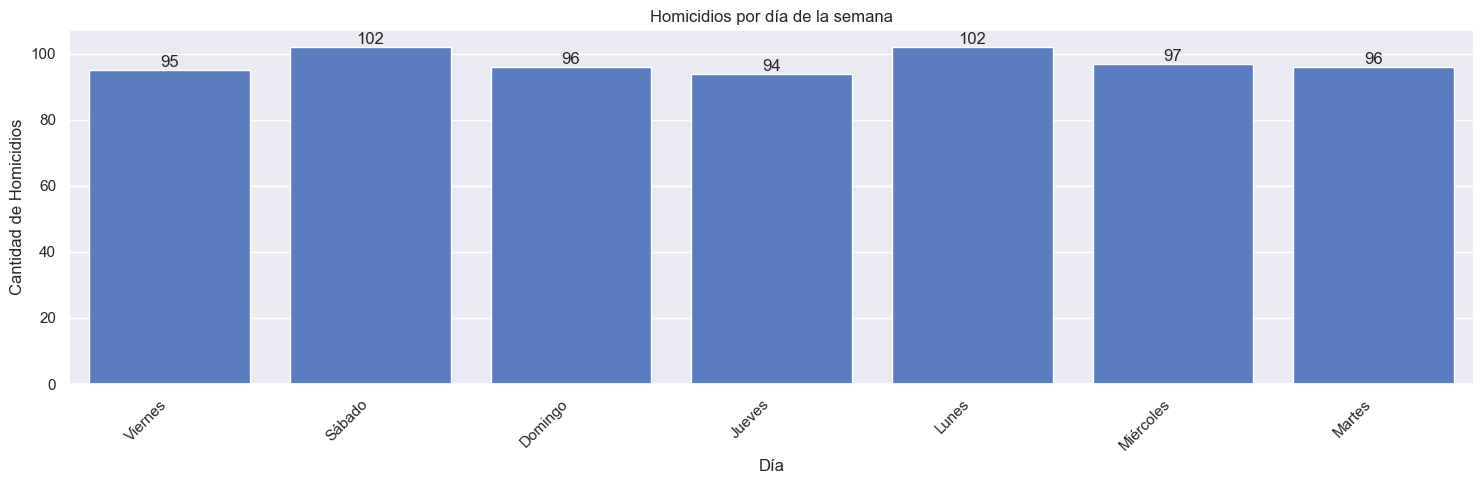

In [67]:
# Creamos los datos de homicidios por día de la semana en donde la fecha no es 'SD'
data = (dfHechos[dfHechos['fecha'] != 'SD']['day name'].reset_index())

# Creamos la figura
plt.figure(figsize = (15, 5))
# Se establece el día de la semana como 'x'
ax = sns.countplot(data = data, x = 'day name')
# Se añade el conteo a las barras
for label in ax.containers:
    ax.bar_label(label)

# Se configura el gráfico
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Día')
plt.title('Homicidios por día de la semana')
plt.tight_layout()
# Se muestra el gráfico
plt.show()

Podemos ver que los días Lunes y Sábado son los días de la semana donde hay más homicidios; sin embargo la diferencia con los demás días no es mucha, así que se puede considerar irrelevante. 

### Distribución por hora del día
A continuación se hace una gráfica que refleja la segmentación de las horas del día para identificar cuales son las horas del día donde más ocurren estos hechos. 

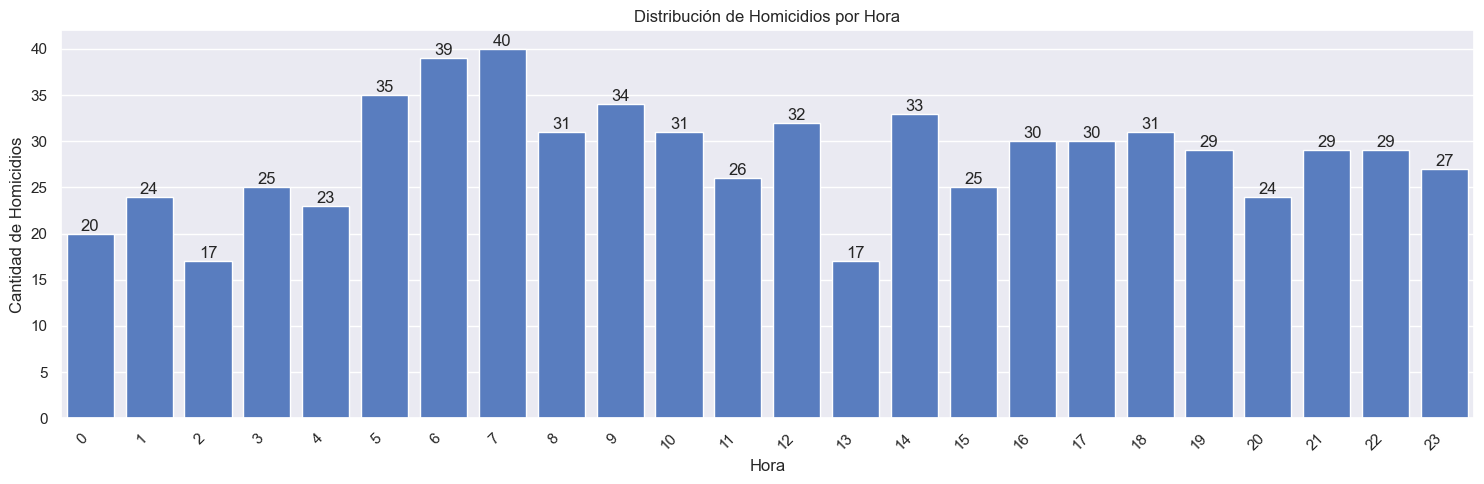

In [70]:
# Creamos los datos de los homicidios
data = dfHechos[dfHechos['hora entera'] != 'SD']['hora entera'].astype(int).round(0).reset_index()
# Creamos la figura
plt.figure(figsize = (15, 5))
# Asignamos la hora como 'x'
ax = sns.countplot(data = data.sort_values('hora entera'), x = 'hora entera')
# Se añade el conteo a cada barra
for label in ax.containers:
    ax.bar_label(label)
# Se configura el gráfico
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Hora')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Homicidios por Hora')
plt.tight_layout()
# Se muestra el gráfico
plt.show()

Podemos ver que los picos más altos en esta gráfica se presentan en las horas de la mañana, siendo las 7 de la mañana el más alto. Asimismo los picos más bajos estan a la 1 del medio día y a las 2 de la madrugada.

Así que podemos concluir que la mayoría de hechos se presentan en las horas de la mañana, desde las 5 hasta las 8 de la mañana, y habiendo otro pico importante a las 9 de la mañana. Esta información puede relacionarse con horas pico, horas de alto tráfico vehicular, horarios donde comienzan y finalizan las jornadas laborales, etc. 

### Distribución de Edades de las Víctimas
A continuación abondaremos la información sobre la edad de las víctimas, con el finde identificar patrones que nos den información relevante. 
Para esto se hace un histograma con linea de distribución y un boxplot. 

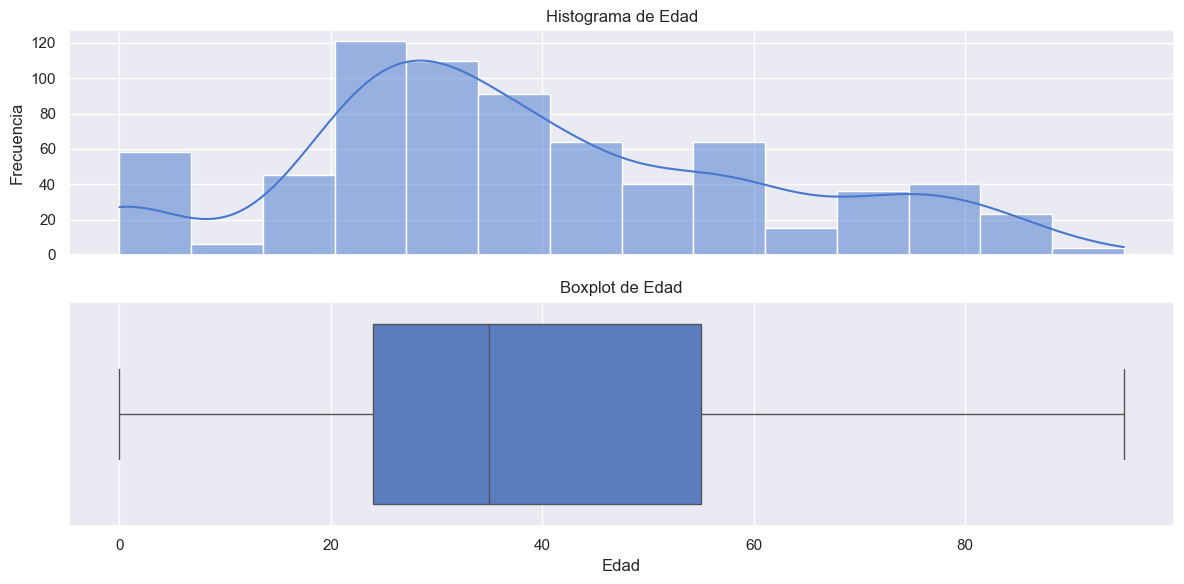

In [71]:
# Creamos los datos de los homicidios donde la edad no es 'SD' convirtiéndolos en int
data = dfVictimas[dfVictimas['edad'] != 'SD']['edad'].astype(int).reset_index()

# Creamos la figura
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
# Se grafica el histograma de la edad
sns.histplot(data['edad'], kde=True, ax=ax[0])
ax[0].set_title('Histograma de Edad') ; ax[0].set_ylabel('Frecuencia')
    
# Se grafica el boxplot de la edad
sns.boxplot(x=data['edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

plt.tight_layout()
plt.show()

Se puede ver en los gráficos que la mayoría de victimas están en el rango de edades de 35-55 años aproximadamente. No se observan edades atípicas y se puede observar que el rango de edad de todas las víctimas es bastante amplio, desde edades tempranas, hasta los 95 años. 
Claramente la distribución muestra una mayor concentración en las edades que van desde los 20 a los 40 años de edad.

Para tener cifras más precisas, hacemos el cálculo de medidas de tendencia central a continuación:

In [ ]:
stats = data['edad'].describe().round(2)
print(f'La edad media (mediana) de las víctimas es de: {stats[5]}')
print(f'El edad promedio (mean) de las víctimas es de: {round(stats[1],2)}')
print(f'El 75% de las víctimas tienen una edad menor de: {stats[6]}')

La edad media (mediana) de las víctimas es de: 35.0
El edad promedio (mean) de las víctimas es de: 39.05
El 75% de las víctimas tienen una edad menor de: 55.0


Con esto podemos concluir que la gran mayoría de las victimas tienen una edad menor a los 55 años (el 75%); y que el promedio de edades de las victimas se encuentra al rededor de los 40 años. 

Seguidamente haremos boxplots para analizar las edades por años, y si hay presencia de valores atípicos:

### Edades de Víctimas por Año

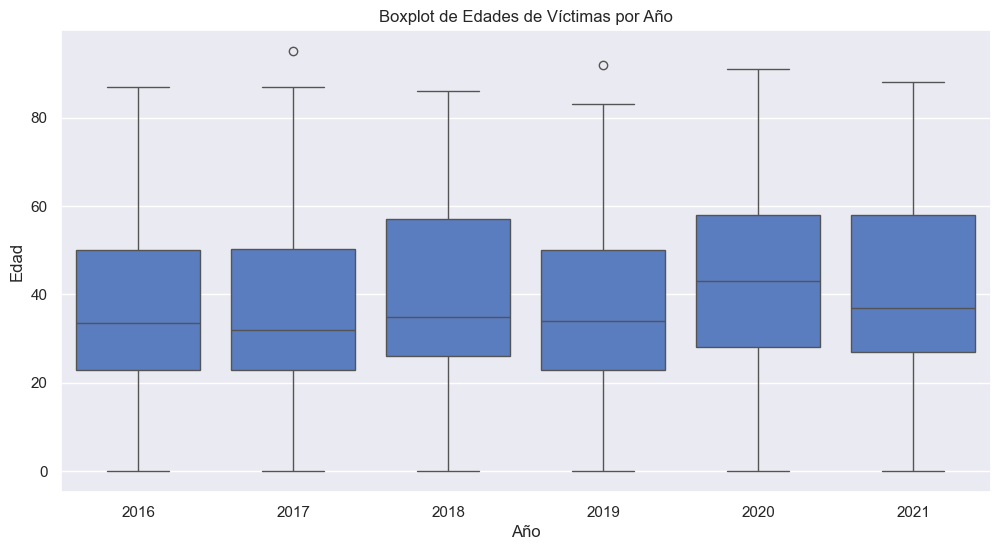

In [72]:
# Creamos la data que usaremos
data = (dfVictimas[dfVictimas[['año','edad']] != 'SD'][['año','edad']].dropna().astype(int).reset_index())

# Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='año', y='edad', data=data)
    
plt.title('Boxplot de Edades de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Edad')
plt.show()

Al ver los boxplots para las edades de las victimas, se puede decir que los rangos de edad de todos los años son similares, predominando las edades entre los 20 y 60 años. También se pueden ver algunos valores atipicos en años como el 2017 y 2019 para edades de adultos mayores los cuales son mínimos.

### Relación Edad - Sexo

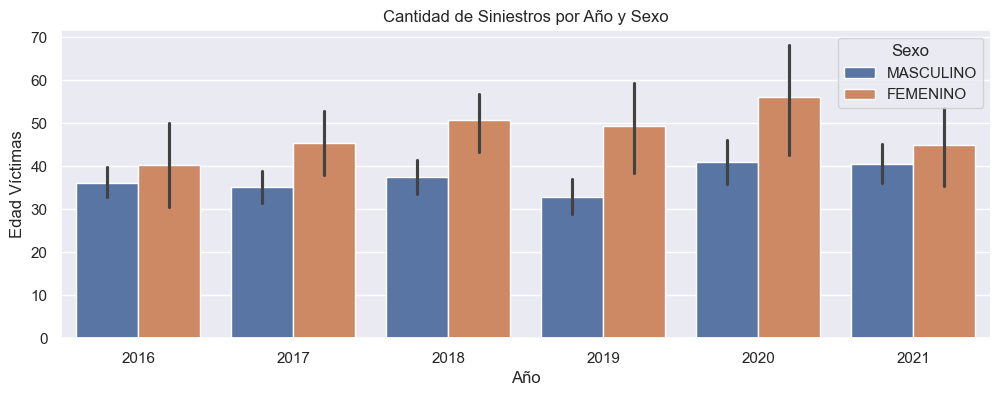

In [73]:
# Creamos los datos que vamos a usar
data = (dfVictimas[dfVictimas[['año','edad','sexo']] != 'SD'][['año','edad','sexo']].reset_index())
# Creamos la figura
plt.figure(figsize=(12, 4))
# Creamos el gráfico con el año en el eje X, la edad en el eje Y y separamos por sexo
sns.barplot(x='año', y='edad', hue='sexo', data=data, palette='deep')
# Se configura el gráfico
plt.title('Cantidad de Siniestros por Año y Sexo')
plt.xlabel('Año') ; plt.ylabel('Edad Víctimas') ; plt.legend(title='Sexo')
    
# Se muestra el gráfico
plt.show()

Del gráfico anterior se puede decir que las personas con edades mayores afectadas por los siniestros son de sexo femenino, teniendo un rango hasta los casi 60 años; en cuanto a los hombres, las edades estuvieron en rangos similares durante todos los años que fue al rededor de los 40 años. 

También se puede ver un pico en el año 2020 que venía desde una leve tendencia que cayó en el año siguiente. 

In [76]:
# Observamos los datos numéricos de ese gráfico
sexo_año = dfHomicidios.groupby(['año', 'sexo']).size().reset_index(name='Cantidad')
resultado = sexo_año['Cantidad'].sum()
sexo_año

,año,sexo,Cantidad
0,2016,FEMENINO,27
1,2016,MASCULINO,112
2,2016,SD,1
3,2017,FEMENINO,36
4,2017,MASCULINO,99
5,2018,FEMENINO,38
6,2018,MASCULINO,110
7,2019,FEMENINO,27
8,2019,MASCULINO,77
9,2020,FEMENINO,16


### Edad por Tipo de Victima 
A continuación haremos un grafico que nos ayude a visualizar las edades por tipo de victimas, en este caso usaremos un boxplot:


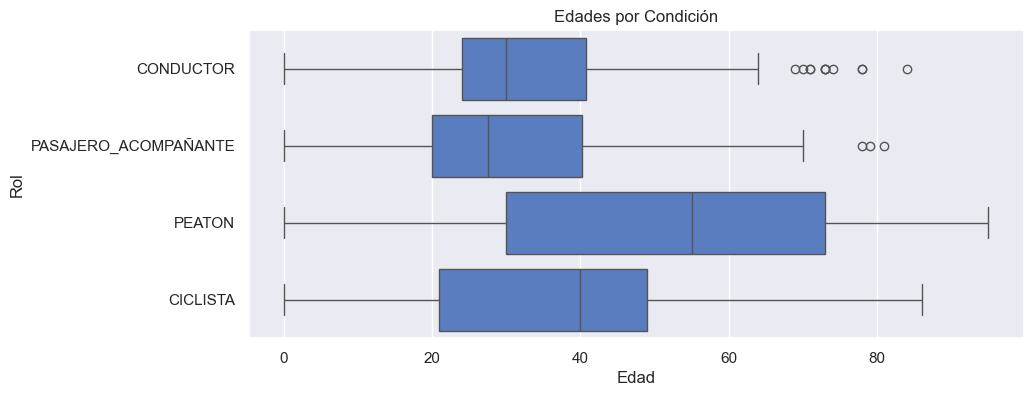

In [87]:
# Creamos los datos de los las víctimas donde la edad y el rol no son nulos
data = dfVictimas[dfVictimas[['rol', 'edad']] != 'SD']
# Convertimos la edad a entero
data['edad'] = data['edad'].dropna().astype(int)

# Creamos el gráfico
plt.figure(figsize=(10, 4))
sns.boxplot(y = 'rol', x = 'edad', data = data)
plt.title('Edades por Condición')
plt.ylabel('Rol')
plt.xlabel('Edad')
plt.show()

De estos boxplots podemos decir que las condiciones de victima que están en rangos parecidos son los de: 'conductor', 'pasajero_acompañante' y 'ciclista'. Los rangos de de conductor y pasajero acompañante son bastante similares, lo cual tiene sentido en personas jovenes que son los que conducen a mayor velocidad, tienen menos experiencia conduciendo o apenas están empezando a conducir.

Para los peatones se observa un rango de edades mayor, abarcando desde niños a personas mayores al rededor de los 90 años. Esto tiene sentido porque los peatones no tienen exigencias específicas para poder ser peatón, casi que cualquier persona puede ser peatón, así es de que la edad para este tipo de victima puede ser cualquiera.

Y respecto a los valores atipicos que se observan, se consideran totalmente esperados para este análisis.

A continuación analizaremos la relación entre la edad de las victimas y el tipo de vehiculo en el que se movilizaban en el momento del siniestro:

### Relación Edad Víctima - Vehículo

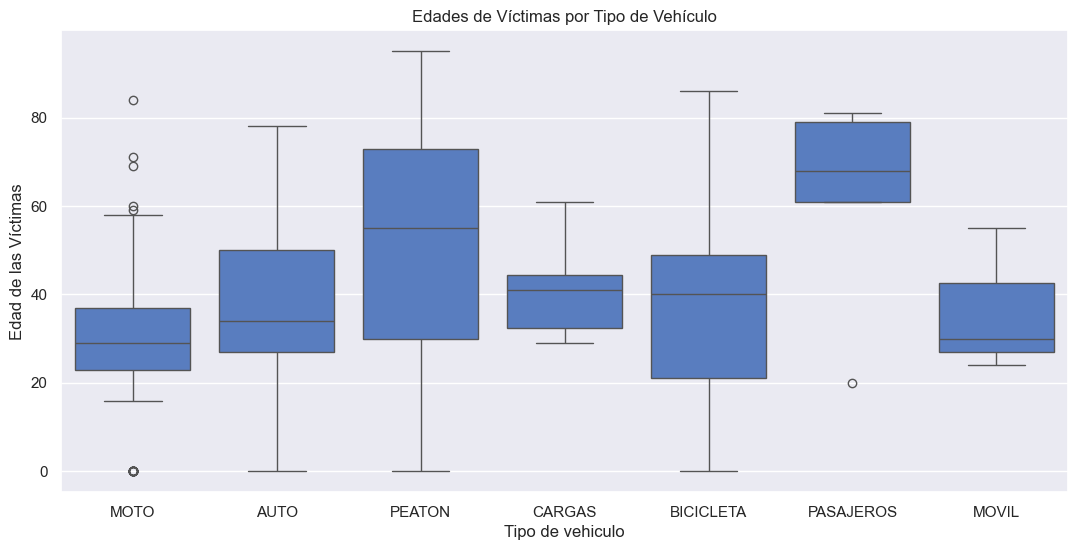

In [103]:
# Creamos los datos donde la víctima y la edad no son nulos
data = dfVictimas[dfVictimas[['victima','edad']] != 'SD']

plt.figure(figsize=(13, 6))
sns.boxplot(x='victima', y='edad', data=data) 
plt.title('Edades de Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehiculo') ; plt.ylabel('Edad de las Víctimas')
plt.show()

En este gráfico podemos notar bastante dispersión en los datos de las edades por tipo de vehículo. Podemos ver que siendo peatón el rango de edades es mucho más amplio, ya que casi cualquier persona de cualquier edad puede ser un peatón. También podemos observar que las victimas que son pasajeros se concentran en edades mayores y las edades menores se concentran en vehículos más asequibles como motos, bicicletas y móviles. Este gráfico nos ayuda a identificar patrones que tienen información valiosa para el contexto y objetivo del proyecto, pues se pueden implementar estrategias diferentes para cada segmento de victimas por edades y vehiculos para disminuir la ocurrencia de estos hechos.

### Relación Víctima - Sexo


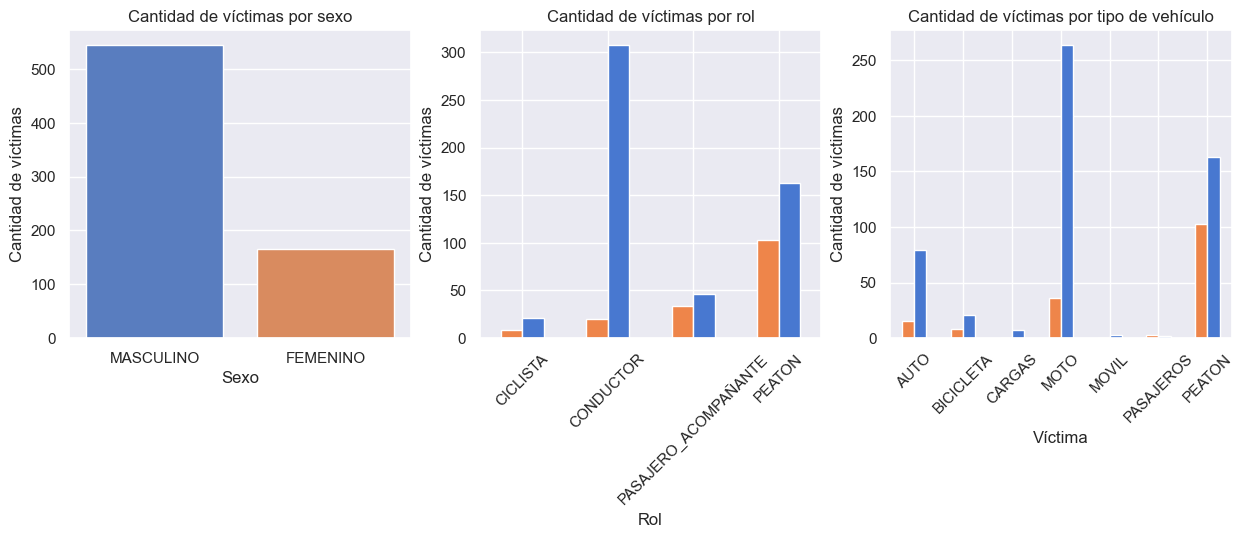

In [114]:
# Creamos los datos de los las víctimas donde el sexo, el rol, y la víctima no son nulos
data = dfVictimas[dfVictimas[['sexo','rol','victima']] != 'SD']

# Establecemos la paleta de color
palette = sns.color_palette('muted')
palette = [palette[1], palette[0]]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Gráfico 1: sexo
sns.countplot(data=data, x='sexo', ax=axes[0], palette='muted')
axes[0].set_title('Cantidad de víctimas por sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Cantidad de víctimas')

# Gráfico 2: Rol
dataRol = data.groupby(['rol', 'sexo']).size().unstack(fill_value=0)
dataRol.plot(kind='bar', ax=axes[1], color=palette)
axes[1].set_title('Cantidad de víctimas por rol')
axes[1].set_xlabel('Rol')
axes[1].set_ylabel('Cantidad de víctimas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)
    
# Gráfico 3: Tipo de vehículo
dataVictima = data.groupby(['victima', 'sexo']).size().unstack(fill_value=0)
dataVictima.plot(kind='bar', ax=axes[2], color=palette)
axes[2].set_title('Cantidad de víctimas por tipo de vehículo')
axes[2].set_xlabel('Víctima')
axes[2].set_ylabel('Cantidad de víctimas')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend().set_visible(False)

plt.show()

En estas 3 gráficas podemos ver que por bastante diferencia, el sexo más afectado por estos hechos es el masculino. Hay una gran diferencia en el sexo especialmente cuando vemos los roles de conductores, evidentemente la gran mayoría de conductores son de género masculino. 

También es importante destacar el constraste de la cantidad de victimas por moto de género masculino frente al femenino, pues hay una diferencia bastante grande y asimismo las motos también presentan gran proporción de los accidentes. 

Y por último, es importante ver el contraste de género para el rol de peatón, pues la mayoría también es de género masculino, lo que indica que son más las victimas fatales de genero masculino que femenino; esto resulta bastante curioso, pues tendrían que estudiarse más a fondo otros factores de porqué sucede de esta forma, así no haya una diferencia tan grande se presta para plantearse aún más hipótesis que ayuden a disminuir estos hechos.



### Relación Víctima - Acusado

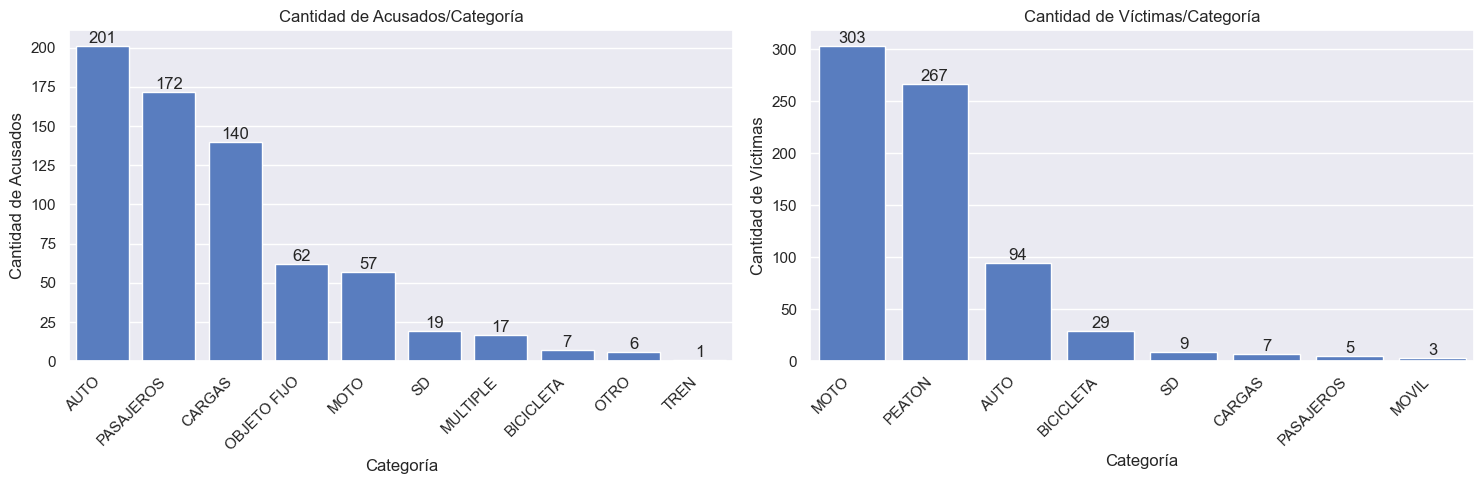

In [90]:
# Creamos un orden para el eje x del primer subplot basado en la cantidad de acusados
orderA = dfHechos['acusado'].value_counts().reset_index()
orderA.columns = ['acusado', 'count']
orderA = orderA.sort_values(by='count', ascending=False)
plt.figure(figsize = (15, 5))

# Creamos el primer subplot
plt.subplot(1, 2, 1)
# Se establece la columna de acusado como 'x'
ax = sns.countplot(data = dfHechos, x = 'acusado', order=orderA['acusado'])
# Se configura el gráfico
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Acusados')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Acusados/Categoría')

# Creamos un orden para el eje x del segundo subplot basado en la cantidad de víctimas
orderB = dfHechos['victima'].value_counts().reset_index()
orderB.columns = ['victima', 'count']
orderB = orderB.sort_values(by='count', ascending=False)

# Creamos el segundo subplot
plt.subplot(1, 2, 2)
# Se establece la columna de víctima como 'x'
ax = sns.countplot(data = dfVictimas, x = 'victima', order=orderB['victima'])
# Se configura el gráfico
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Víctimas')
plt.xlabel('Categoría')
plt.title('Cantidad de Víctimas/Categoría')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Del gráfico de acusados, podemos ver que los conductores de auto los que más acusaciones tienen por estos siniestros, seguidos por los pasajeros y los vehiculos de cargas; esta información es bastante interesante ya que surgen varias incognitas de por qué los pasajeros serían culpables de un siniestro, entonces según el diccionario de datos, los pasajeros son personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia; lo cual quiere decir que existe gran proporción de siniestros causados por diversas situaciones donde estos sujetos se ven involucrados.

Por otra parte, del gráfico de víctimas podemos ver que la mayoría de victimas que se ven afectadas son los motociclistas, seguidamente de los peatones y en menor proporcion los demás. Este contraste en las victimas tiene sentido, pues los motociclistas están altamente expuestos a siniestros viales por las condiciones de velocidad, desprotección, características del vehículo, entre otras cosas. 


### Participantes en los Siniestros 
A continuación analizaremos la información de los participantes totales de los siniestros.

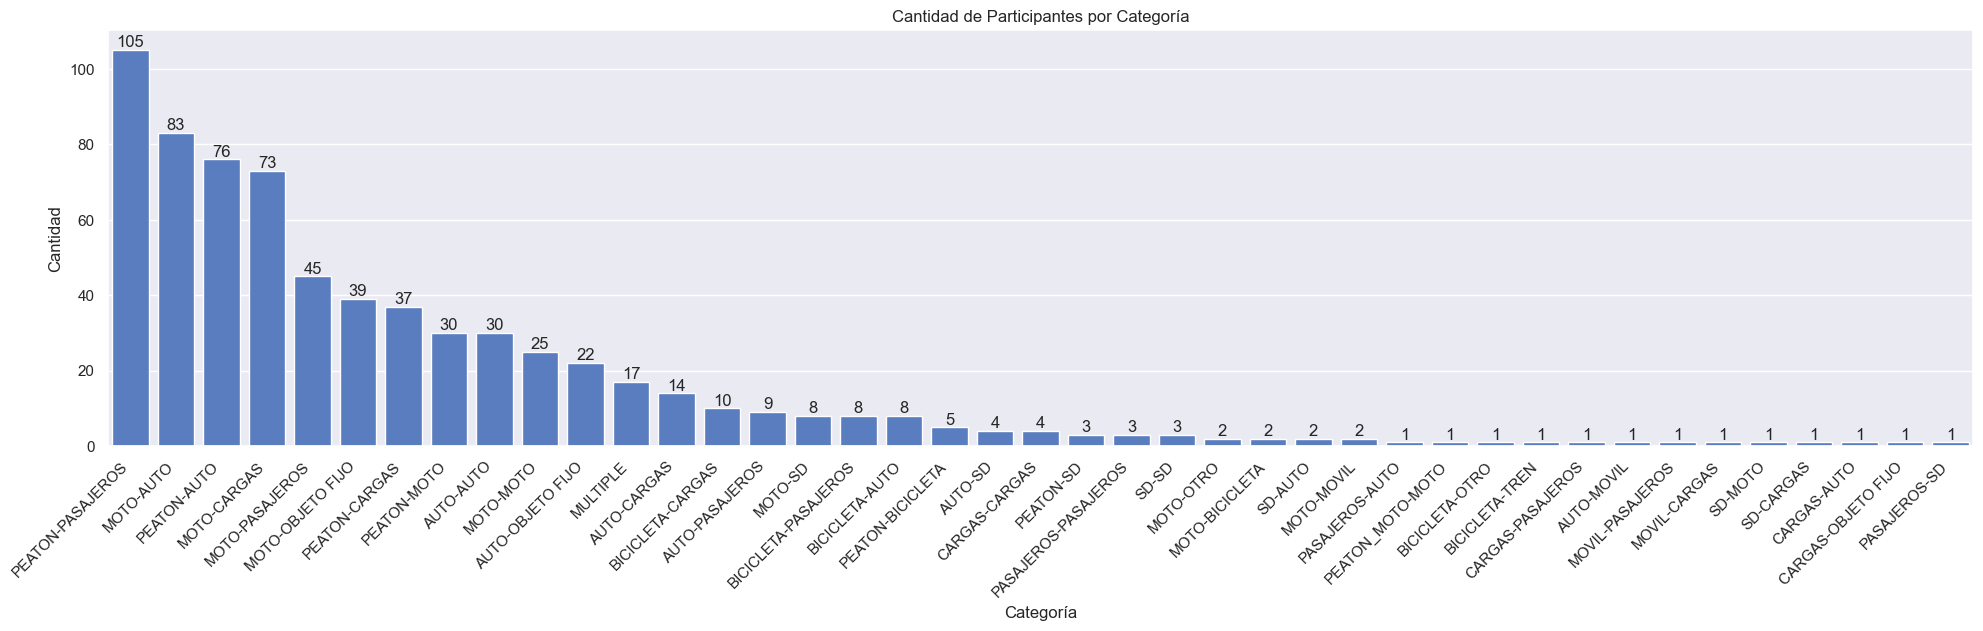

In [94]:
# Creamos un orden para el eje x basado en las categrías de participantes
orderA = dfHechos['participantes'].value_counts().reset_index()
orderA.columns = ['participantes', 'count']
orderA = orderA.sort_values(by='count', ascending=False)

plt.figure(figsize = (20, 5))
# Se establece la columna de participantes como 'x'
ax = sns.countplot(data = dfHechos, x = 'participantes', order=orderA['participantes'])
# Se configura el gráfico
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad')
plt.tight_layout()
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Participantes por Categoría')
plt.show()

En esta gráfica podemos ver que la categoría 'peatón-pasajero' (víctima-acusado) es la que tiene mayor cantidad de participantes; lo que resulta bastante llamativo, pues en las gráficas de categorías por separado no eran las categorías mayoritarias. Esto nos puede dar una noción de que las acusaciones hacia la categoría 'Auto' también pueden estar relacionadas con los pasajeros. 

Para ver la tabla de esta relación hacemos lo siguiente:

In [96]:
dfHomicidios[dfHomicidios['participantes'] == 'PEATON-PASAJEROS'][['participantes', 'victima', 'acusado']]

,participantes,victima,acusado
13,PEATON-PASAJEROS,PEATON,PASAJEROS
21,PEATON-PASAJEROS,PEATON,PASAJEROS
23,PEATON-PASAJEROS,PEATON,PASAJEROS
27,PEATON-PASAJEROS,PEATON,PASAJEROS
34,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...
664,PEATON-PASAJEROS,PEATON,PASAJEROS
669,PEATON-PASAJEROS,PEATON,PASAJEROS
670,PEATON-PASAJEROS,PEATON,PASAJEROS
691,PEATON-PASAJEROS,PEATON,PASAJEROS


Finalmente para concluir este apartado, podemos indentificar que los participantes que más se involucran en los siniestros viales son: peatones, pasajeros, moto, auto y vehiculos de cargas.

### Distribución Geográfica 


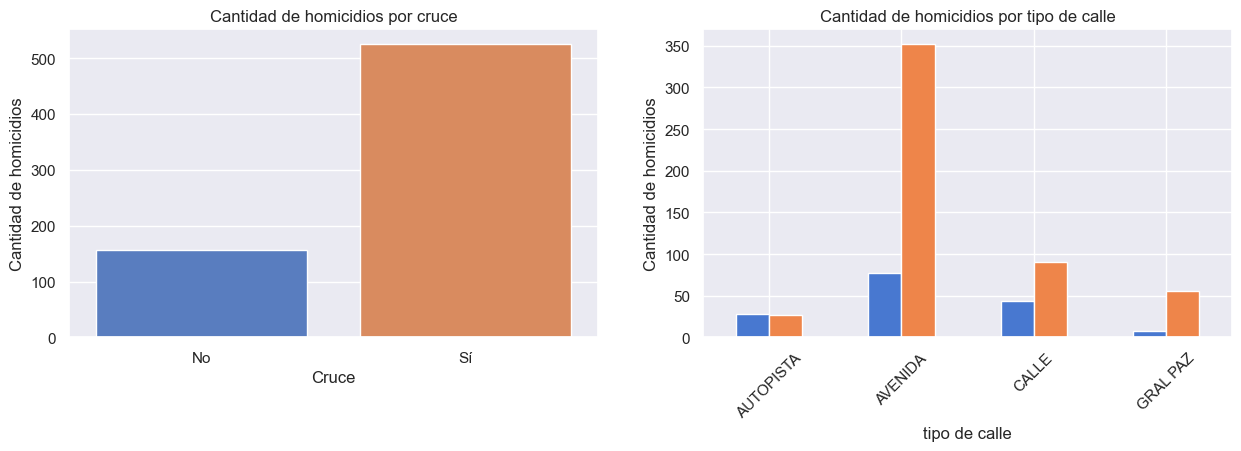

In [116]:
# Creamos los datos de los homicidios donde el tipo de calle, el cruce y las víctimas no son 'SD'
data = dfHechos[dfHechos[['tipo de calle','cruce','victima']] != 'SD']

# Definimos la paleta de colores
palette = sns.color_palette('muted')
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Gráfico 1: sexo
sns.countplot(data=data, x='cruce', ax=axes[0], palette='muted')
axes[0].set_title('Cantidad de homicidios por cruce')
axes[0].set_xlabel('Cruce')
axes[0].set_xticklabels(['No','Sí'])
axes[0].set_ylabel('Cantidad de homicidios')

# Gráfico 2: Rol
dataRol = data.groupby(['tipo de calle', 'cruce']).size().unstack(fill_value=0)
dataRol.plot(kind='bar', ax=axes[1], color=palette)
axes[1].set_title('Cantidad de homicidios por tipo de calle')
axes[1].set_ylabel('Cantidad de homicidios')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)

En esta gráfca es evidente la diferencia de la cantidad de hechos ocurridos en un cruce frente a los que no; más del 70% de los hechos ocurren en cruces y la gran mayoría en cruces con avenidas. Esto cobra sentido ya que en las avenidas hay mayor cantidad de cruces que en una autopista por ejemplo, y además los límites de velocidad no son tan reducidos como en las calles normalmente. 
Así que a paritr de estas estadisticas se puede generar información valiosa que ayude a proteger la vida de las personas. 